In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import os

In [2]:

folder = '/scratch/es60/rlc599/IQuOD/1992/'
file_name = os.path.join(folder, 'iquod_xbt_1992.nc')

# open the netcdf file for this dataset
ds = xr.open_dataset(file_name)
# get the unique cast identifiers
wod_unique_cast = ds['wod_unique_cast'].values
# get the IQUOD flags
flags = ds['Temperature_IQUODflag'].copy()
# change to a dataframe
flags_df = pd.DataFrame(flags.values)


In [3]:
flags_df

,0
0,1
1,1
2,1
3,1
4,2
...,...
12488138,2
12488139,2
12488140,2
12488141,2


In [4]:
# add a column to the dataframe for the cast identifier
flags_df['wod_unique_cast'] = flags_df.index.get_level_values(0)
# set these values to zero for now
flags_df['wod_unique_cast'] = 0
flags_df['depthNumber'] = 0
flags_df['wod_unique_cast'] = flags_df['wod_unique_cast'].astype('int64')
flags_df['depthNumber'] = flags_df['depthNumber'].astype('int64')
# drop the old index
flags_df = flags_df.reset_index(drop=True)
# loop over the unique cast identifiers and add the cast identifier to the flags_df for the same number of z_row_size 
start = 0
for i, cast in enumerate(wod_unique_cast):
    # get the length of the cast
    length = ds['Temperature_row_size'][i].values
    # fill the wod_unique_cast column with the cast identifier from the start to start + length
    flags_df['wod_unique_cast'].values[start:start + int(length)] = cast
    # fill the depthNumber column from 0 to length for this cast
    flags_df['depthNumber'].values[start:start + int(length)] = range(0, int(length))
    # update the start index for the next cast
    start = start + int(length)
flags_df

,0,wod_unique_cast,depthNumber
0,1,7695034,0
1,1,7695034,1
2,1,7695034,2
3,1,7695034,3
4,2,7695034,4
...,...,...,...
12488138,2,4040756,104
12488139,2,4040756,105
12488140,2,4040756,106
12488141,2,4040756,107


In [6]:
# append the temperature and depth data from ds to the flags_df dataframe
flags_df['Temperature'] = ds['Temperature'].values.flatten()
flags_df['Depth'] = ds['z'].values.flatten()


,0,wod_unique_cast,depthNumber,Temperature,Depth
0,1,7695034,0,15.191636,-3.189602
1,1,7695034,1,15.141706,32.593491
2,1,7695034,2,15.021874,36.798038
3,1,7695034,3,14.971944,44.152794
4,2,7695034,4,14.981930,46.253948
...,...,...,...,...,...
12488138,2,4040756,104,8.640820,795.764709
12488139,2,4040756,105,8.610862,801.696289
12488140,2,4040756,106,8.580904,808.612000
12488141,2,4040756,107,8.560932,810.586670


In [8]:
# label first column as 'Temperature_IQUODflag'
flags_df.columns = ['Temperature_IQUODflag', 'wod_unique_cast', 'depthNumber', 'Temperature', 'Depth']
flags_df

,Temperature_IQUODflag,wod_unique_cast,depthNumber,Temperature,Depth
0,1,7695034,0,15.191636,-3.189602
1,1,7695034,1,15.141706,32.593491
2,1,7695034,2,15.021874,36.798038
3,1,7695034,3,14.971944,44.152794
4,2,7695034,4,14.981930,46.253948
...,...,...,...,...,...
12488138,2,4040756,104,8.640820,795.764709
12488139,2,4040756,105,8.610862,801.696289
12488140,2,4040756,106,8.580904,808.612000
12488141,2,4040756,107,8.560932,810.586670


In [29]:
# plot temperature vs depth for the first cast where the flag is 1
cast = flags_df['wod_unique_cast'].values[0]
cast_df = flags_df[flags_df['wod_unique_cast'] == cast]
cast_df = cast_df[(flags_df['Temperature_IQUODflag'] >= 0) & (cast_df['Temperature_IQUODflag'] <= 4)]
cast_df

/jobfs/140015535.gadi-pbs/ipykernel_2921559/3120117936.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cast_df = cast_df[(flags_df['Temperature_IQUODflag'] >= 0) & (cast_df['Temperature_IQUODflag'] <= 4)]


,Temperature_IQUODflag,wod_unique_cast,depthNumber,Temperature,Depth
0,1,7695034,0,15.191636,-3.189602
1,1,7695034,1,15.141706,32.593491
2,1,7695034,2,15.021874,36.798038
3,1,7695034,3,14.971944,44.152794
4,2,7695034,4,14.981930,46.253948
5,2,7695034,5,15.321454,47.304256
6,2,7695034,6,15.720894,52.554741
7,2,7695034,7,15.870684,53.604794
8,2,7695034,8,15.621034,58.853172
9,2,7695034,9,15.700922,63.051266


No handles with labels found to put in legend.


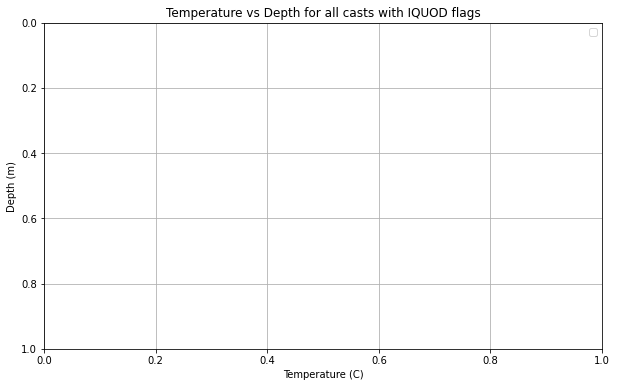

In [31]:
# plot temperature vs depth for all casts where the flag is greater than 0 and plot in a different color for each flag
plt.figure(figsize=(10, 6))
# get the unique flags
unique_flags = cast_df['Temperature_IQUODflag'].unique()
# loop over the unique flags and plot each one
for flag in unique_flags:
    # get the casts for this flag
    cast_df = cast_df[cast_df['Temperature_IQUODflag'] == flag]
    # plot the temperature vs depth for this flag
    plt.plot(cast_df['Temperature'].values, cast_df['Depth'].values, 'o-', label=f'Flag {flag}')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth for all casts with IQUOD flags')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

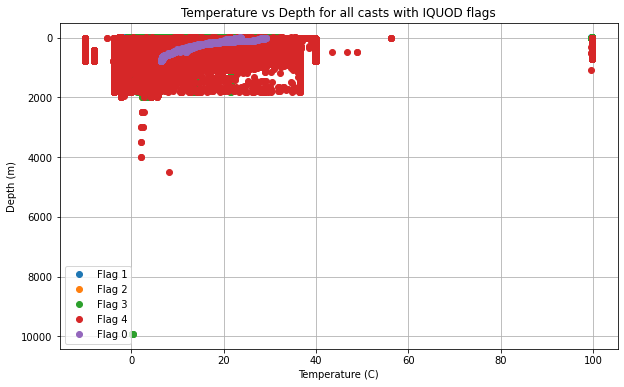

In [16]:
# plot temperature vs depth for all casts where the flag is greater than 0 and plot in a different color for each flag
plt.figure(figsize=(10, 6))
# get the unique flags
unique_flags = flags_df['Temperature_IQUODflag'].unique()
# loop over the unique flags and plot each one
for flag in unique_flags:
    # get the casts for this flag
    flag_df = flags_df[flags_df['Temperature_IQUODflag'] == flag]
    # plot the temperature vs depth for this flag
    plt.plot(flag_df['Temperature'].values, flag_df['Depth'].values, 'o', label=f'Flag {flag}')
plt.gca().invert_yaxis()
plt.title('Temperature vs Depth for all casts with IQUOD flags')
plt.xlabel('Temperature (C)')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

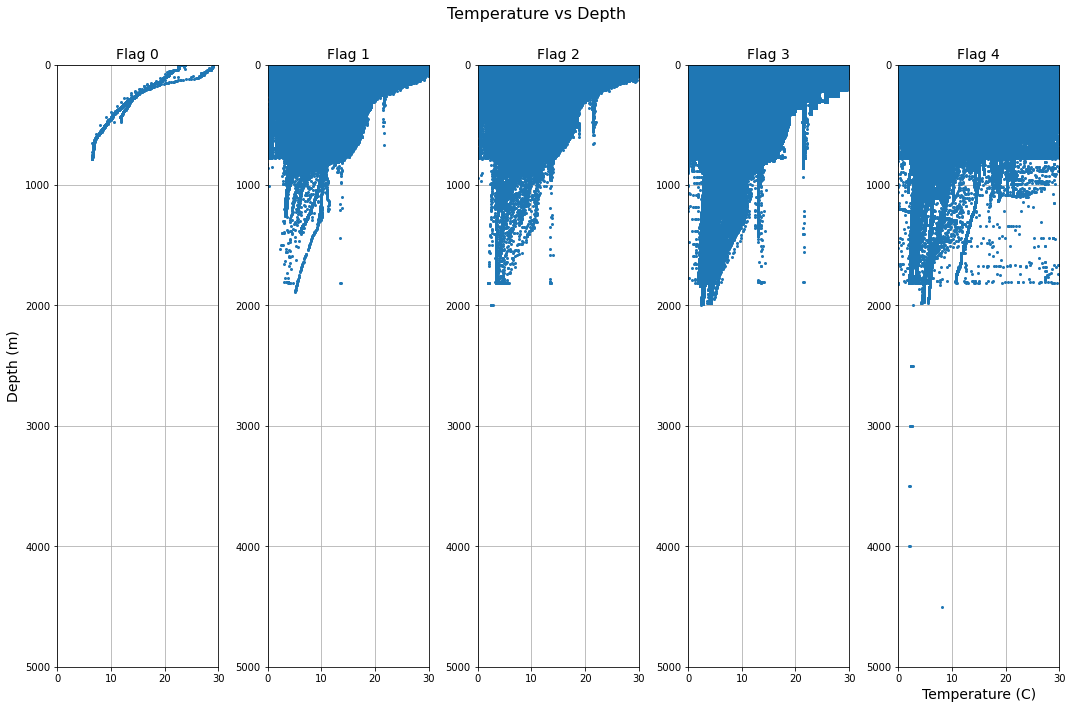

In [43]:
# plot temperature vs depth in five subplots, one for each flag
fig, axs = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
# set the title of the figure
fig.suptitle(f'Temperature vs Depth', fontsize=16)
# set the x and y labels
axs[0].set_ylabel('Depth (m)', fontsize=14)
axs[4].set_xlabel('Temperature (C)', fontsize=14)
# loop over the flags
for i in range(5):
    # get the data for this flag
    flag_data = flags_df[flags_df['Temperature_IQUODflag'] == i]
    # plot the data
    axs[i].plot(flag_data['Temperature'].values, flag_data['Depth'].values, 'o', markersize=2)
    # set the title of the subplot
    axs[i].set_title(f'Flag {i}', fontsize=14)
    # set the x and y limits
    axs[i].set_xlim(0, 30)
    axs[i].set_ylim(0, 5000)
    axs[i].invert_yaxis()
# set the grid
for ax in axs:
    ax.grid(True)
# show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
